#                       Cambodia Investment Report 2023 & 2024
-------------

In [196]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

cambodia_map = gpd.read_file('province.geojson')

df1 = pd.read_csv('investment_report(1).csv')
df3 = pd.read_csv("investment_report(3).csv")
df2 = pd.read_csv('investment_report(2).csv')
df5 = pd.read_csv('investment_report(5).csv')

df3.columns = df3.columns.str.strip()

df3['Capital & Provinces'] = df3['Capital & Provinces'].replace({
    'Sihanoukville': 'Preah Sihanouk',
    'Preah Vihea': 'Preah Vihear',  
    'Stueng Treng': 'Stung Treng' ,
    "Phanom Penh": "Phnom Penh",
    "Kndal": "Kandal"
})

cambodia_map['Province'] = cambodia_map['HRName']

merged = cambodia_map.set_index('Province').join(df3.set_index('Capital & Provinces'))


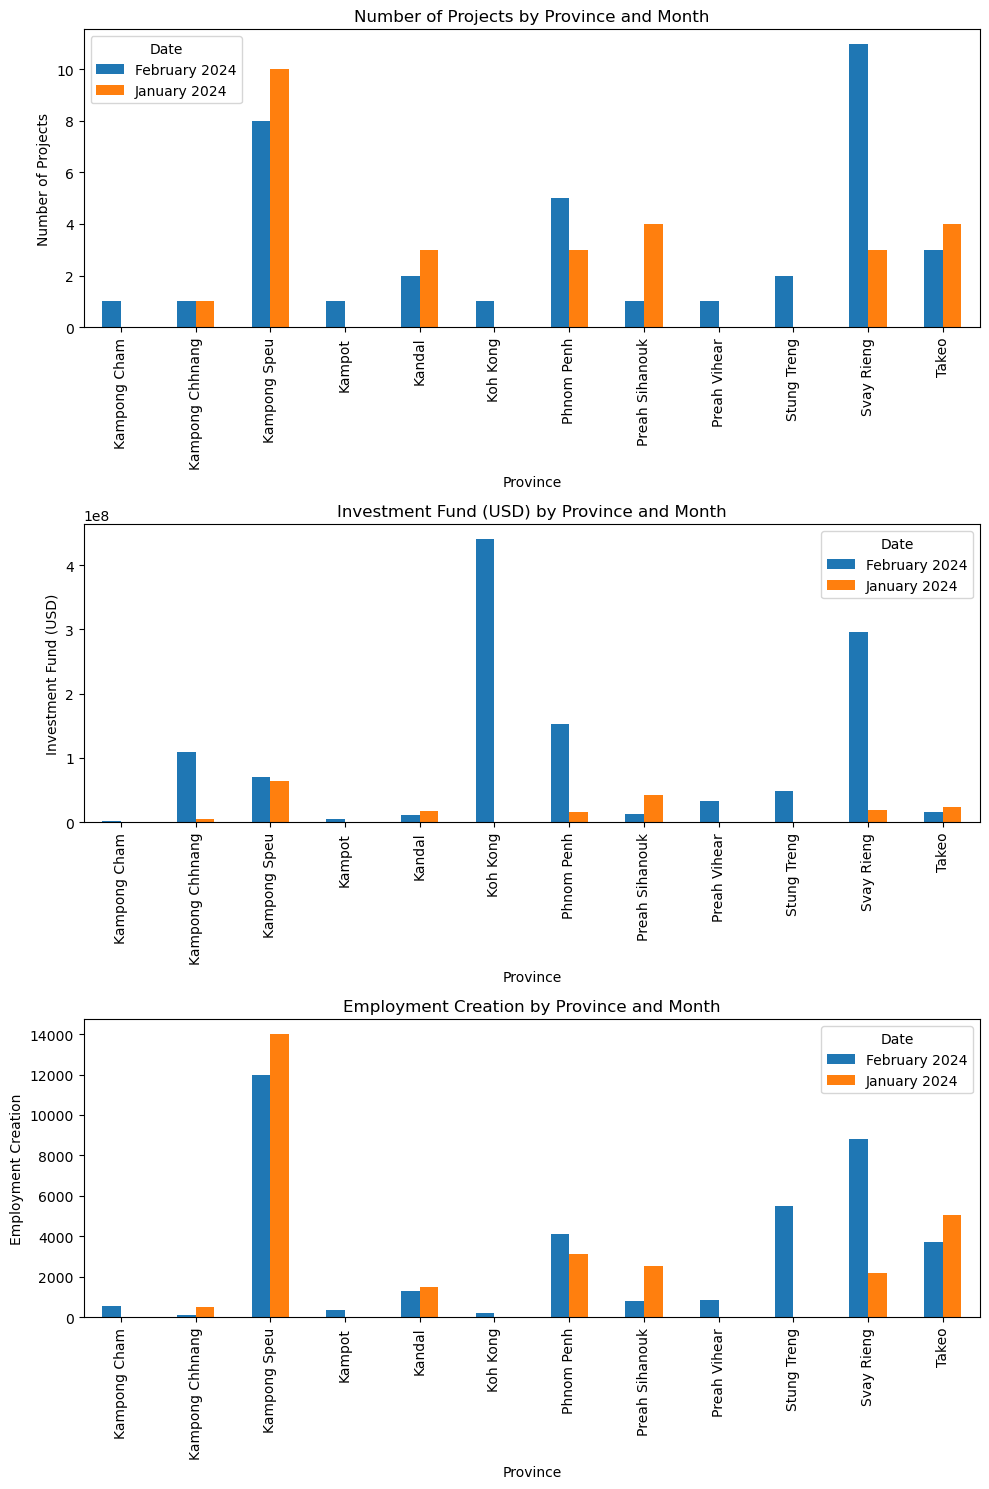

In [197]:
aggregated = df3.groupby(['Date', 'Capital & Provinces']).agg({
    'No.Project': 'sum',
    'Investment Fund (USD)': 'sum',
    'Employment creation': 'sum'
}).reset_index()

# Step 3: Create bar graphs
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting No. Project
project_pivot = aggregated.pivot(index="Capital & Provinces", columns="Date", values="No.Project")
project_pivot.plot(kind='bar', ax=axs[0])
axs[0].set_title('Number of Projects by Province and Month')
axs[0].set_ylabel('Number of Projects')
axs[0].set_xlabel('Province')

# Plotting Investment Fund (USD)
investment_pivot = aggregated.pivot(index="Capital & Provinces", columns="Date", values="Investment Fund (USD)")
investment_pivot.plot(kind='bar', ax=axs[1])
axs[1].set_title('Investment Fund (USD) by Province and Month')
axs[1].set_ylabel('Investment Fund (USD)')
axs[1].set_xlabel('Province')

# Plotting Employment creation
employment_pivot = aggregated.pivot(index="Capital & Provinces", columns="Date", values="Employment creation")
employment_pivot.plot(kind='bar', ax=axs[2])
axs[2].set_title('Employment Creation by Province and Month')
axs[2].set_ylabel('Employment Creation')
axs[2].set_xlabel('Province')

plt.tight_layout()
plt.show()

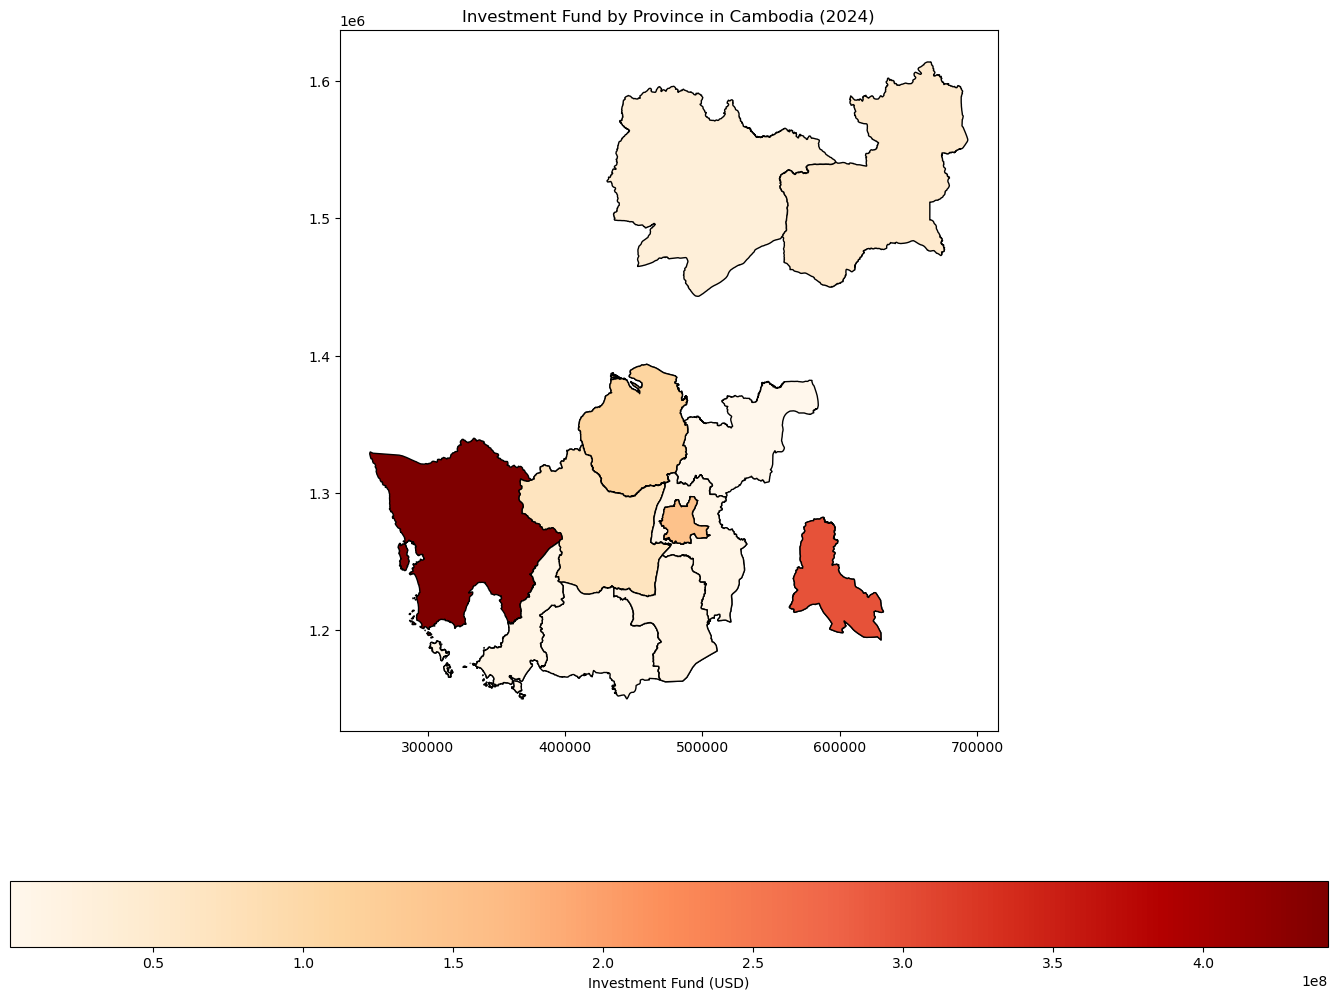

In [198]:

fig, ax = plt.subplots(1, 1, figsize=(17, 13))
merged.plot(column='Investment Fund (USD)', ax=ax, legend=True,
            legend_kwds={'label': "Investment Fund (USD)", 'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

plt.title("Investment Fund by Province in Cambodia (2024)")
plt.show()

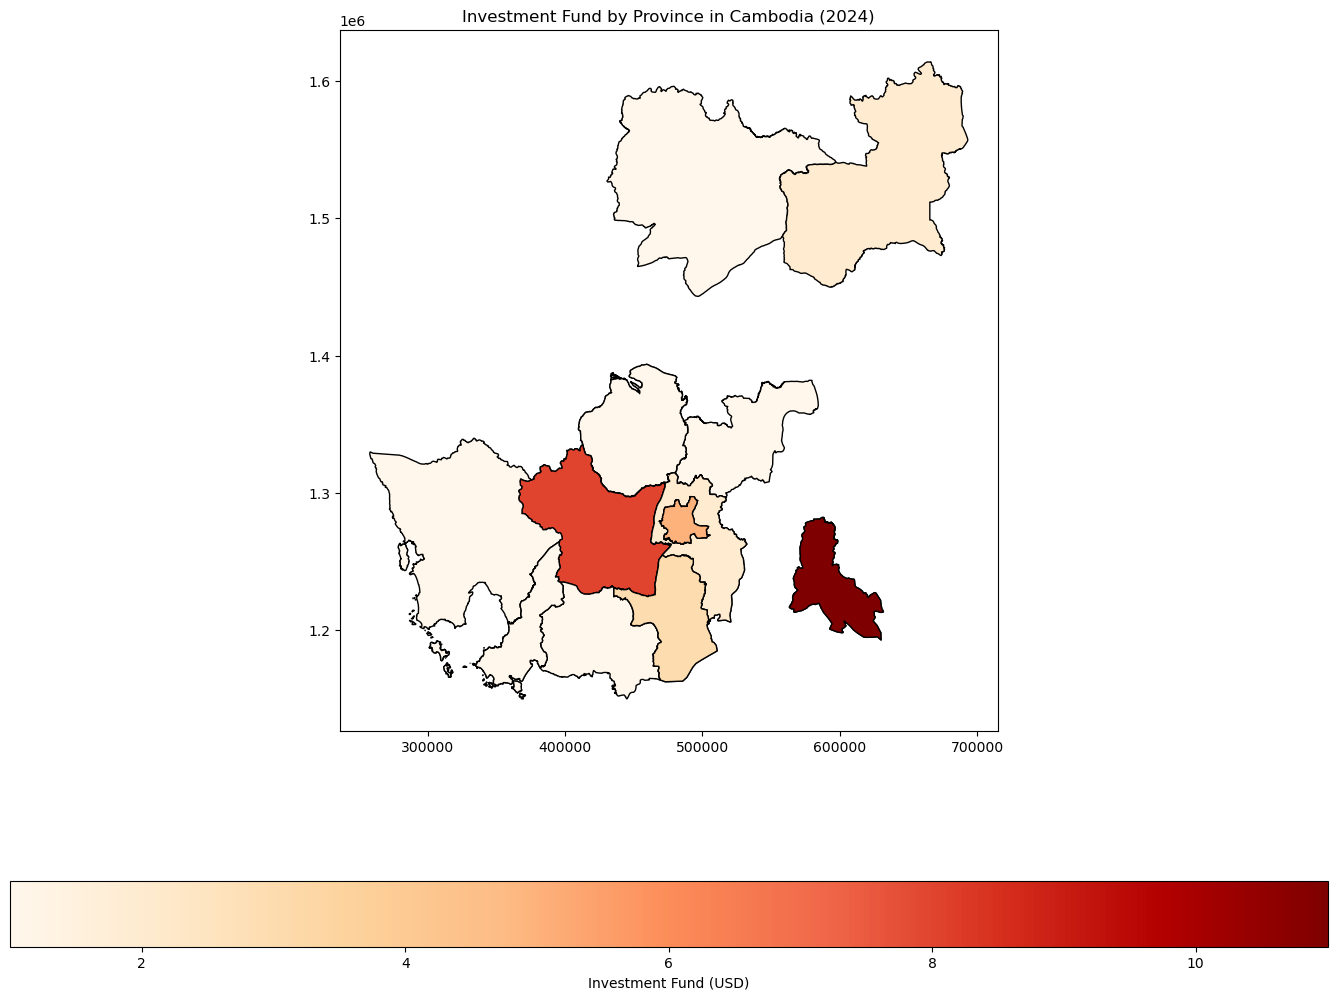

In [199]:
fig, ax = plt.subplots(1, 1, figsize=(17, 13))
merged.plot(column='No.Project', ax=ax, legend=True,
            legend_kwds={'label': "Investment Fund (USD)", 'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

plt.title("Investment Fund by Province in Cambodia (2024)")
plt.show()

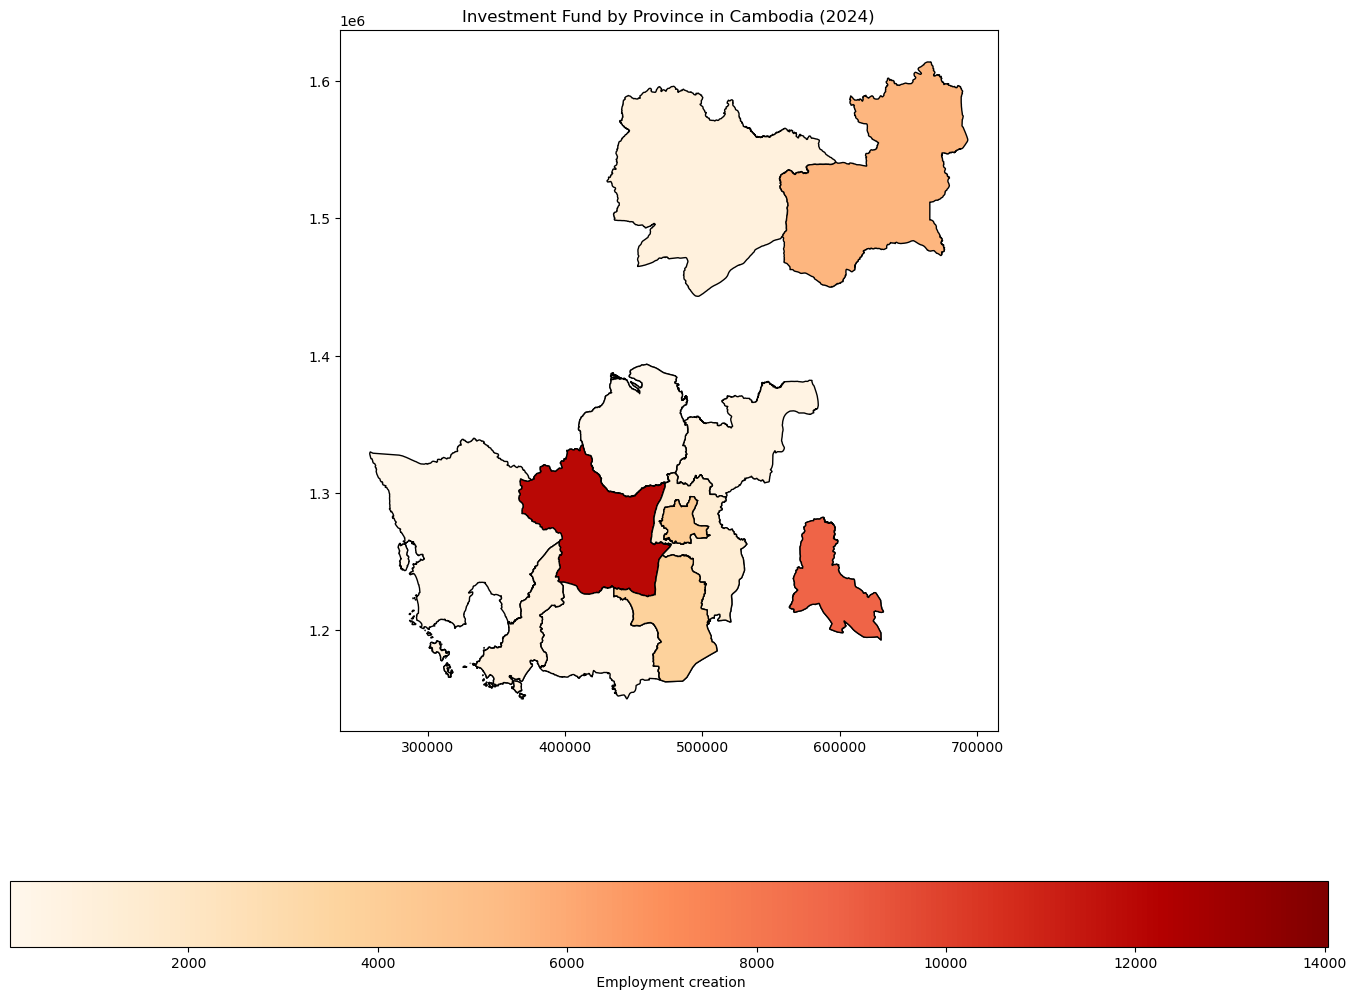

In [200]:
fig, ax = plt.subplots(1, 1, figsize=(17, 13))
merged.plot(column='Employment creation', ax=ax, legend=True,
            legend_kwds={'label': " Employment creation", 'orientation': "horizontal"},
            cmap='OrRd', edgecolor='black')

plt.title("Investment Fund by Province in Cambodia (2024)")
plt.show()

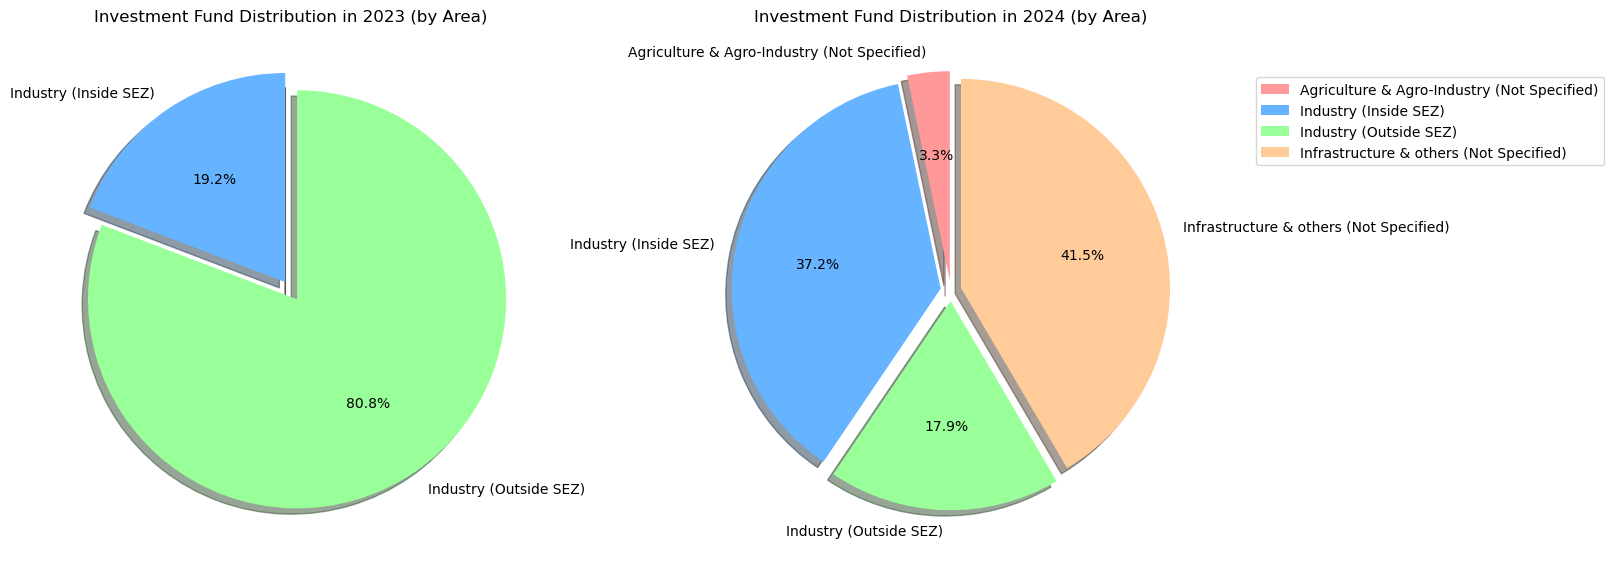

In [201]:
# Correcting the explode parameter setup based on the number of non-zero sectors for each year
explode_2023 = [0.05 if val > 0 else 0 for val in investment_by_year_area.loc[2023]]
explode_2024 = [0.05 if val > 0 else 0 for val in investment_by_year_area.loc[2024]]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
investment_by_year_area.loc[2023].plot(
    kind='pie', ax=ax[0], autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90, legend=False, shadow=True, colors=colors[:len(explode_2023)], explode=explode_2023)
investment_by_year_area.loc[2024].plot(
    kind='pie', ax=ax[1], autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
    startangle=90, legend=False, shadow=True, colors=colors[:len(explode_2024)], explode=explode_2024)

ax[0].set_ylabel('')
ax[1].set_ylabel('')
ax[0].set_title('Investment Fund Distribution in 2023 (by Area)')
ax[1].set_title('Investment Fund Distribution in 2024 (by Area)')

# Adjusting the legend position higher
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1, 0.8))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


C:\Users\panha\AppData\Local\Temp\ipykernel_12208\1104951351.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Year'] = pd.to_datetime(df2['Date']).dt.year


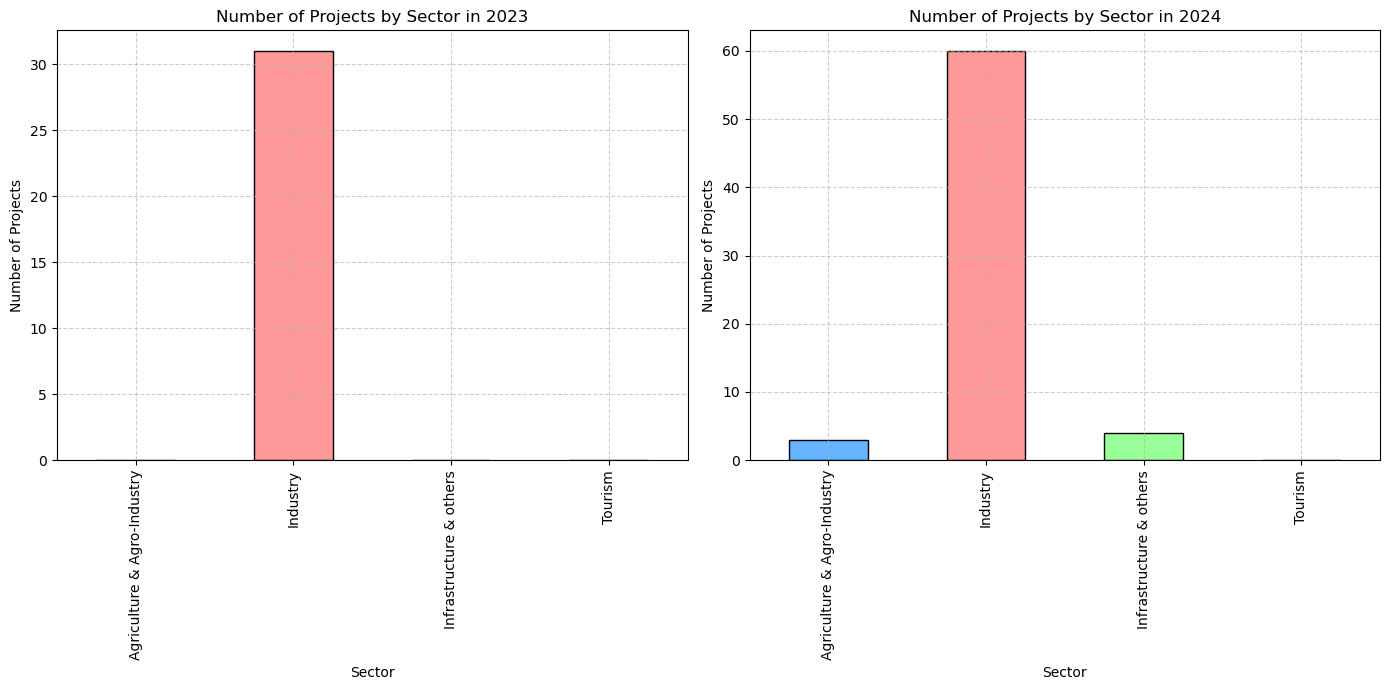

In [202]:
df2['Year'] = pd.to_datetime(df2['Date']).dt.year
projects_by_year = df2.groupby(['Year', 'Sector'])['Number of Projects'].sum().unstack(fill_value=0)

colors_2023 = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']
colors_2024 = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99']

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
projects_by_year.loc[2023].plot(
    kind='bar', ax=ax[0], color=colors_2023, edgecolor='black')
projects_by_year.loc[2024].plot(
    kind='bar', ax=ax[1], color=colors_2024, edgecolor='black')

ax[0].set_title('Number of Projects by Sector in 2023')
ax[1].set_title('Number of Projects by Sector in 2024')
ax[0].set_xlabel('Sector')
ax[1].set_xlabel('Sector')
ax[0].set_ylabel('Number of Projects')
ax[1].set_ylabel('Number of Projects')

# Adding gridlines for better readability
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

C:\Users\panha\AppData\Local\Temp\ipykernel_12208\3143501048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['Date'] = pd.to_datetime(df1['Date'])


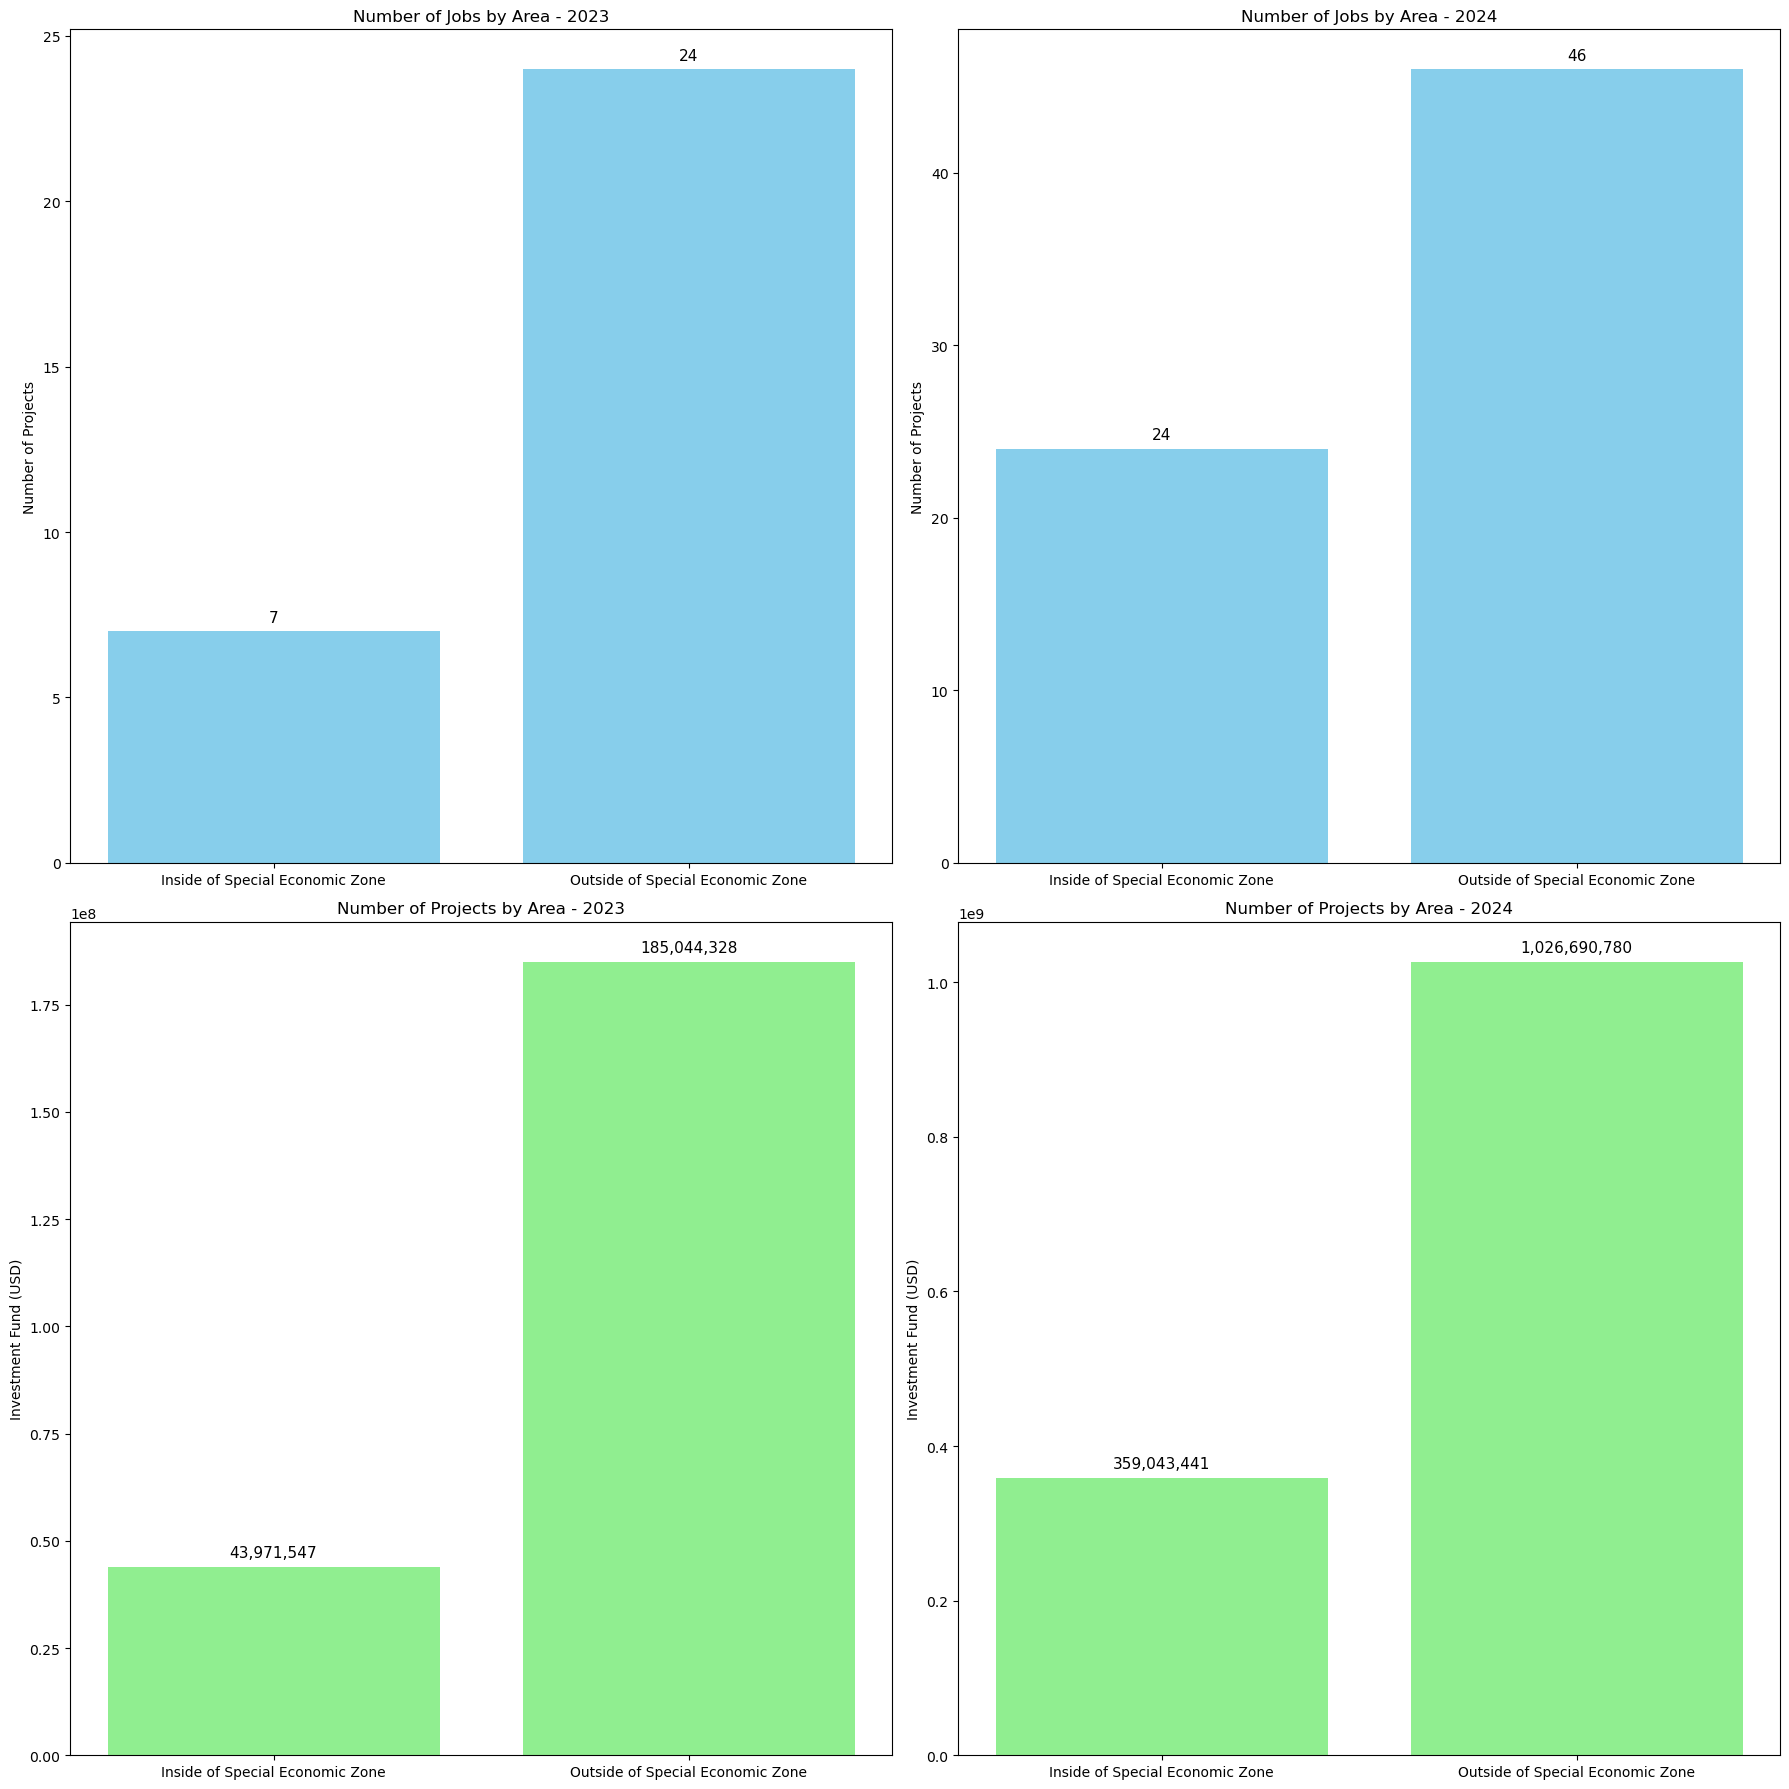

In [203]:
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract 'Year' from 'Date'
df1['Year'] = df1['Date'].dt.year

# Group data by Area and Year
area_year_grouped = df1.groupby(['Area', 'Year']).agg({
    'Number of Projects': 'sum',
    'Investment Fund (USD)': 'sum'
}).unstack(fill_value=0)  # Unstack to create separate columns for each year

# Plotting area comparison by year
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Configuring subplots for each metric by year
metrics = ['Number of Projects', 'Investment Fund (USD)']
colors = ['skyblue', 'lightgreen', 'salmon']
titles = ['Number of Jobs by Area', 'Number of Projects by Area', 'Investment Fund by Area']

for i, metric in enumerate(metrics):
    # 2023
    axes[i][0].bar(area_year_grouped.index, area_year_grouped[(metric, 2023)], color=colors[i])
    axes[i][0].set_title(f'{titles[i]} - 2023')
    axes[i][0].set_ylabel(metric)
    
    # 2024
    axes[i][1].bar(area_year_grouped.index, area_year_grouped[(metric, 2024)], color=colors[i])
    axes[i][1].set_title(f'{titles[i]} - 2024')
    axes[i][1].set_ylabel(metric)

    # Correcting and placing annotations properly
    for ax in axes[i]:
        for p in ax.patches:
            ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10),
                        textcoords='offset points')

plt.tight_layout()
plt.show()

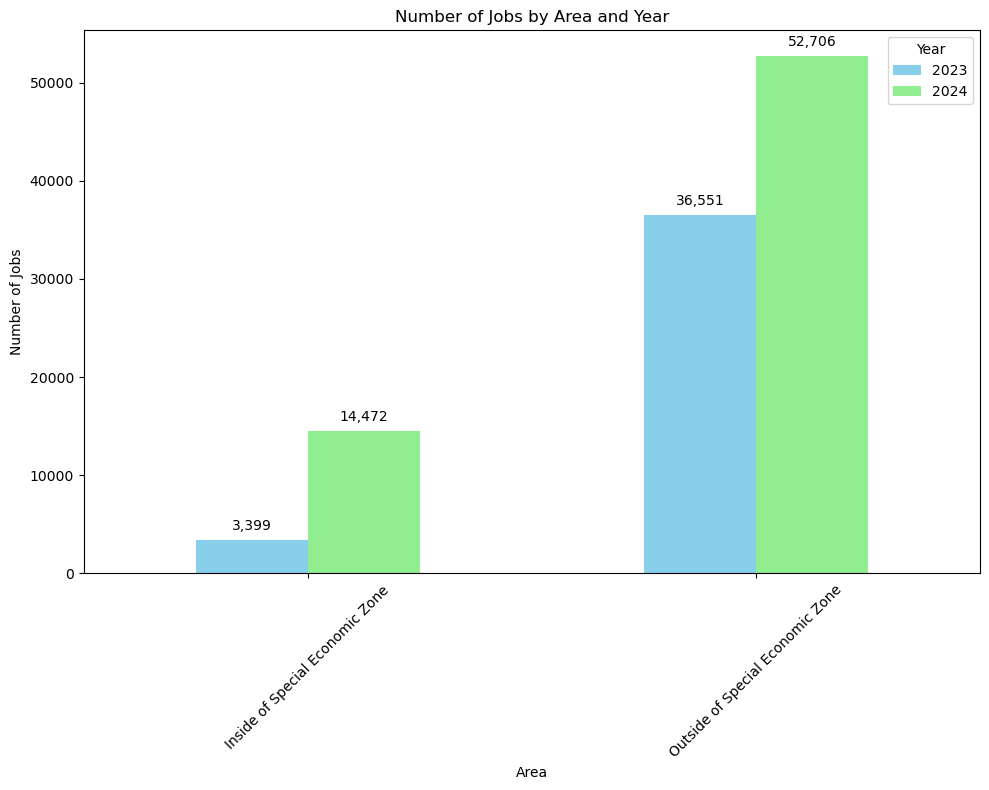

In [204]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Number of Jobs'] = df1['Number of Jobs'].fillna(0)

jobs_by_area_year = df1.groupby(['Area', 'Year'])['Number of Jobs'].sum().unstack()


df1['Number of Jobs'] = pd.to_numeric(df1['Number of Jobs'], errors='coerce').fillna(0)

jobs_by_area_year = df1.groupby(['Area', 'Year'])['Number of Jobs'].sum().unstack()

fig, ax = plt.subplots(figsize=(10, 8))
jobs_by_area_year.plot(kind='bar', ax=ax, color=['skyblue', 'lightgreen'])
ax.set_title('Number of Jobs by Area and Year')
ax.set_xlabel('Area')
ax.set_ylabel('Number of Jobs')
ax.set_xticklabels(jobs_by_area_year.index, rotation=45)
ax.legend(title='Year')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.show()


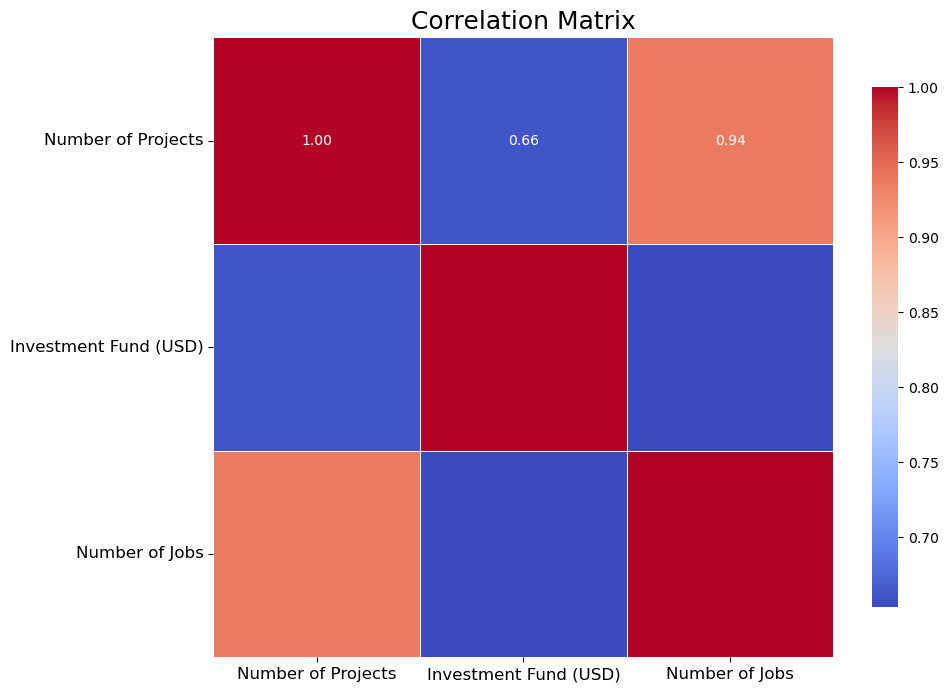

In [205]:
import seaborn as sns
summary = df1.groupby(['Area', 'Status']).agg({
    'Number of Projects': 'sum',
    'Investment Fund (USD)': 'sum',
    'Number of Jobs': 'sum'
}).reset_index()

# Calculating the correlation matrix
correlation = df1[['Number of Projects', 'Investment Fund (USD)', 'Number of Jobs']].corr()

# Plotting the correlation matrix with enhancements
plt.figure(figsize=(10, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True, cbar_kws={"shrink": .75})

# Adding title and improving aesthetics
plt.title('Correlation Matrix', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.show()

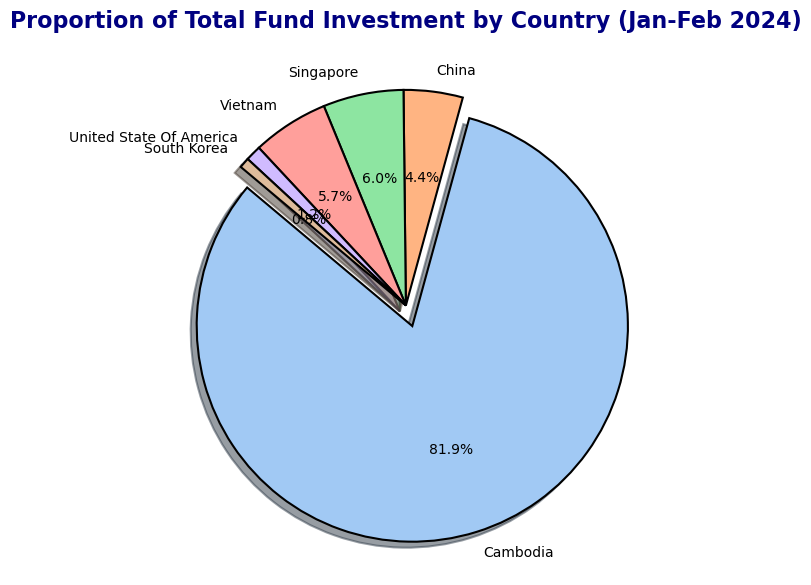

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    "Country": ["Cambodia", "China", "Singapore", "Vietnam", "United State Of America", "South Korea"],
    "Total Fund Investment": [700120898, 37898540, 51617954, 49035575, 10000000, 6635329]
}

df = pd.DataFrame(data)


plt.figure(figsize=(10, 7))


# Adding a title with styling
plt.title('Proportion of Total Fund Investment by Country (Jan-Feb 2024)', fontsize=16, weight='bold', color='navy')

# Adding a shadow and explosion effect
explode = [0.1 if country == 'Cambodia' else 0 for country in df['Country']]
plt.pie(df['Total Fund Investment'], labels=df['Country'], autopct='%1.1f%%', startangle=140, 
        colors=sns.color_palette('pastel'), explode=explode, shadow=True, wedgeprops={'edgecolor': 'black', 'linewidth': 1.5})

plt.show()